In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys
sys.path.insert(1, '../')
import output_utils as ou
import functools as ft

In [17]:
#Layers
layers_Cascavel=ou.parse_layer_file('FCS_2024/results/Cascavel/time_series/layers  1  1.dat')
layers_Darro=ou.parse_layer_file('FCS_2024/results/Darro/time_series/layers  1  1.dat')

#Water temperature profile
twater_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/water_temp  1  1f2.dat', 't_water')
twater_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/water_temp  1  1f2.dat', 't_water')

#Salinity profile
sal_water_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/sal_water  1  1f2.dat', 'sal_water')
sal_water_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/sal_water  1  1f2.dat', 'sal_water')

#Soil temperature profile
tsoil_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/soil_temp  1  1f2.dat', 't_soil')
tsoil_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/soil_temp  1  1f2.dat', 't_soil')

#Methane concentration profile
ch4_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/methane_water  1  1f2.dat', 'ch4')
ch4_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/methane_water  1  1f2.dat', 'ch4')

#Carbon dioxide concentration profile
co2_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/co2_water  1  1f2.dat', 'co2')
co2_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/co2_water  1  1f2.dat', 'co2')

#Dissolved oxygen profile
do_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/oxygen_water  1  1f2.dat', 'do')
do_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/oxygen_water  1  1f2.dat', 'do')

#Phosphorus concentration profile
phosph_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/phosph_water  1  1f2.dat', 'phosph')
phosph_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/phosph_water  1  1f2.dat', 'phosph')

#Chlorophyl-a profile
chla_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/chla  1  1f2.dat', 'chla')
chla_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/chla  1  1f2.dat', 'chla')

#Live particulate organic carbon profile
pocl_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/POCL  1  1f2.dat', 'pocl')
pocl_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/POCL  1  1f2.dat', 'pocl')

#Dead particulate organic carbon profile
pocd_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/POCD  1  1f2.dat', 'pocd')
pocd_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/POCD  1  1f2.dat', 'pocd')

#Dissolved organic carbon profile
doc_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/DOC  1  1f2.dat', 'doc')
doc_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/DOC  1  1f2.dat', 'doc')

#Substrate oxygen demand profile
sod_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/sod  1  1f2.dat', 'sod')
sod_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/sod  1  1f2.dat', 'sod')

#Oxygen production profile
prodox_Cascavel=ou.parse_univariate_file('FCS_2024/results/Cascavel/time_series/prodox  1  1f2.dat', 'prodox')
prodox_Darro=ou.parse_univariate_file('FCS_2024/results/Darro/time_series/prodox  1  1f2.dat', 'prodox')

methane_Cascavel = ou.parse_methane_series('FCS_2024/results/Cascavel/time_series/methane_series  1  1.dat')
methane_Cascavel['co2_turb_flux_mg/(m**2*day)'] = methane_Cascavel['co2_turb_flux_mol/(m**2*s)'] * 44 * 1000 * 86400

methane_Darro = ou.parse_methane_series('FCS_2024/results/Darro/time_series/methane_series  1  1.dat')
methane_Darro['co2_turb_flux_mg/(m**2*day)'] = methane_Darro['co2_turb_flux_mol/(m**2*s)'] * 44 * 1000 * 86400


df_Cascavel = ft.reduce(lambda left, right: pd.merge(left, right, on=['year','month','day','hour','integration_time','depth','Date']), 
                      [twater_Cascavel, sal_water_Cascavel, ch4_Cascavel, co2_Cascavel, do_Cascavel, phosph_Cascavel, chla_Cascavel, pocl_Cascavel,
                       pocd_Cascavel, doc_Cascavel, sod_Cascavel, prodox_Cascavel])
df_Cascavel = df_Cascavel.replace(-999, np.nan)

df_Darro = ft.reduce(lambda left, right: pd.merge(left, right, on=['year','month','day','hour','integration_time','depth','Date']), 
                      [twater_Darro, sal_water_Darro, ch4_Darro, co2_Darro, do_Darro, phosph_Darro, chla_Darro, pocl_Darro,
                       pocd_Darro, doc_Darro, sod_Darro, prodox_Darro])
df_Darro = df_Darro.replace(-999, np.nan)

In [18]:
temp_casc = pd.read_csv('../data/Brazil/in_situ/temperature_samples/processed/Cascavel_R3_2018_2019_temp_C.csv', parse_dates=['Date'])
temp_casc['day'] = temp_casc['Date'].dt.date

temp_darro = pd.read_csv('../data/Brazil/in_situ/temperature_samples/processed/Darro_R1_2018_2019_temp_C.csv', parse_dates=['Date'])
temp_darro['day'] = temp_darro['Date'].dt.date

concentration_data = pd.read_csv('../data/Brazil/in_situ/temperature_samples/processed/Tanguro_July_2023_concentrations.csv')
concentration_data['Depth'] = concentration_data['Depth']*-0.01

df_fluxes = pd.read_csv('../data/Brazil/in_situ/auto_fluxes_all.csv', parse_dates=['Date'])
df_fluxes=df_fluxes.loc[df_fluxes['Date']>pd.to_datetime('2024-01-01')]

outflow_darro = pd.read_csv('../data/Brazil/in_situ/outflow/Darro_R1_outflow.csv', parse_dates=['Date'])
outflow_darro = outflow_darro.loc[outflow_darro['Date'] > pd.to_datetime('2018-01-01')]
outflow_darro['day'] = outflow_darro['Date'].dt.date

/tmp/ipykernel_15324/3069499155.py:13: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  outflow_darro = pd.read_csv('../data/Brazil/in_situ/outflow/Darro_R1_outflow.csv', parse_dates=['Date'])


In [19]:
outflow_darro.columns

Index(['Date', 'Watershed', 'Temp_C', 'Atm_kpa', 'Stream_kpa', 'Water_kpa',
       'Density', 'Logger_cm', 'Logger_LS_cm', 'Gage_AP_cm', 'Gage_LS_cm',
       'Diff_cm', 'Diff_LS_cm', 'Pred_staff_cm', 'Pred_staff_LS_cm',
       'Curve_form', 'Curve_a', 'Curve_b', 'Flow_lps', 'Flow_power_LS_lps',
       'Est_Meas', 'Site_orig', 'Water_year', 'Values - J', 'Hourly Flow',
       'Annual Flow', 'Gap Fill', 'Unnamed: 27', 'day'],
      dtype='object')

/tmp/ipykernel_15324/1557585996.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sns.lineplot(data = temp_casc.loc[(temp_casc['day'] < pd.to_datetime('2019-01-01'))], x='day', y='temp', ax=axes[0], color=sns.color_palette()[0], label='obs.')
/tmp/ipykernel_15324/1557585996.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  sns.lineplot(data = temp_casc.loc[(temp_casc['day'] > pd.to_datetime('2019-01-01'))], x='day', y='temp', ax=axes[0], color=sns.color_palette()[0])
/tmp/ipykernel_15324/1557585996.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to 

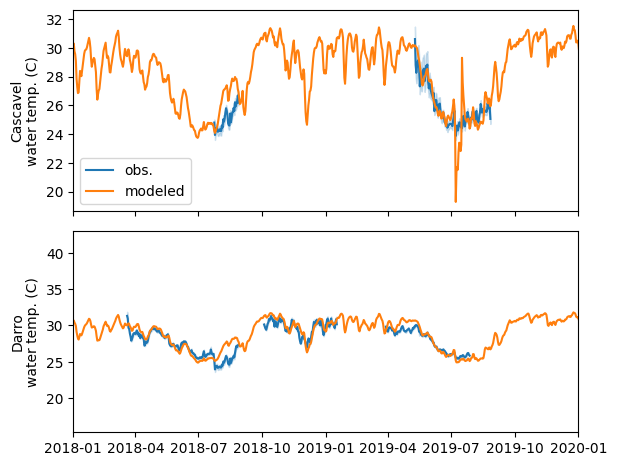

In [20]:
fig, axes = plt.subplots(2,1, sharex=True)

sns.lineplot(data = temp_casc.loc[(temp_casc['day'] < pd.to_datetime('2019-01-01'))], x='day', y='temp', ax=axes[0], color=sns.color_palette()[0], label='obs.')
sns.lineplot(data = temp_casc.loc[(temp_casc['day'] > pd.to_datetime('2019-01-01'))], x='day', y='temp', ax=axes[0], color=sns.color_palette()[0])
sns.lineplot(data = df_Cascavel.loc[(df_Cascavel['depth']==-0.0)], x='Date', y = 't_water', ax=axes[0], color=sns.color_palette()[1], label = 'modeled')

sns.lineplot(data = temp_darro.loc[(temp_darro['day'] < pd.to_datetime('2018-09-30'))], x='day', y='temp', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data = temp_darro.loc[(temp_darro['day'] > pd.to_datetime('2018-09-30')) & (temp_darro['day'] < pd.to_datetime('2019-03-01'))], x='day', y='temp', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data = temp_darro.loc[(temp_darro['day'] > pd.to_datetime('2019-03-01'))], x='day', y='temp', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data = df_Darro.loc[(df_Darro['depth']==-0.0)], x='Date', y = 't_water', ax=axes[1], color=sns.color_palette()[1])

#ax2=axes[1].twinx()
#sns.lineplot(data = outflow_darro, x='day', y='Hourly Flow', ax=ax2)

plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2020-01-01'))
plt.xlabel('')

axes[0].set_ylabel('Cascavel\nwater temp. (C)')
axes[1].set_ylabel('Darro\nwater temp. (C)')
fig.tight_layout()

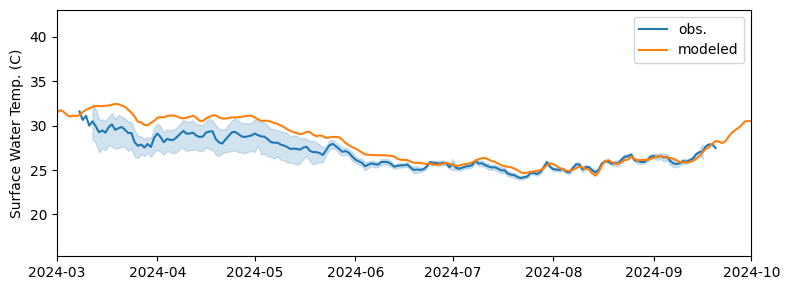

In [21]:
fig, axes = plt.subplots(sharex=True, figsize=(8,3))

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='sur_wat_temp_diff_ch4', color=sns.color_palette()[0], label='obs.')

sns.lineplot(data = df_Darro.loc[(df_Darro['depth']==-0.0)], x='Date', y = 't_water', color=sns.color_palette()[1], label='modeled')

plt.xlim(pd.to_datetime('2024-03-01'), pd.to_datetime('2024-10-01'))
plt.xlabel('')

plt.ylabel('Surface Water Temp. (C)')

fig.tight_layout()

In [22]:
df_Cascavel_conc_comp = df_Cascavel.loc[(df_Cascavel['month']==7) & (df_Cascavel['year']==2023)]
df_Cascavel_conc_comp['Reservoir'] = 'Cascavel R3'
df_Darro_conc_comp = df_Darro.loc[(df_Darro['month']==7) & (df_Darro['year']==2023)]
df_Darro_conc_comp['Reservoir'] = 'Darro R1'

df_conc_comp = pd.concat([df_Cascavel_conc_comp,df_Darro_conc_comp])

/tmp/ipykernel_15324/1044851015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cascavel_conc_comp['Reservoir'] = 'Cascavel R3'
/tmp/ipykernel_15324/1044851015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Darro_conc_comp['Reservoir'] = 'Darro R1'


<Axes: xlabel='Depth', ylabel='CO2_uM'>

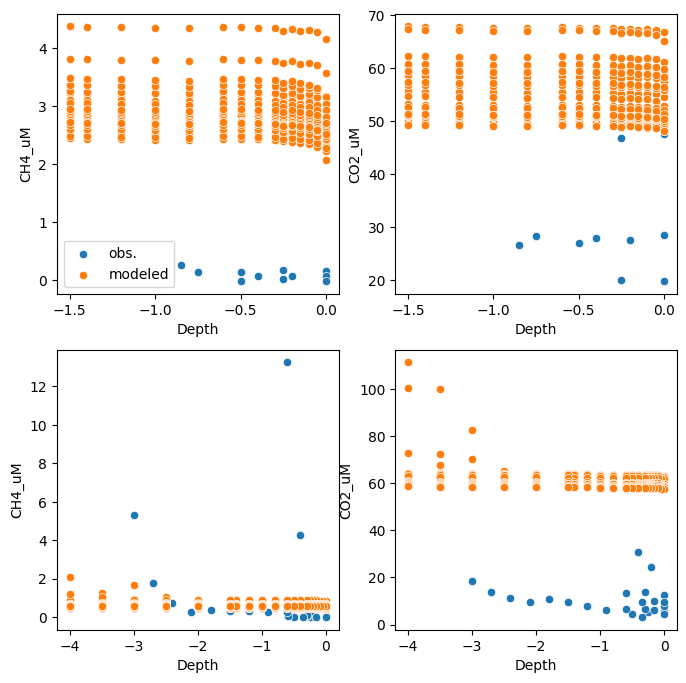

In [23]:
fig, axes=plt.subplots(2,2, figsize=(8,8))
sns.scatterplot(data=concentration_data.loc[concentration_data['Reservoir']=='Cascavel R3'], x='Depth', y='CH4_uM', ax=axes[0,0], label='obs.')
sns.scatterplot(data=df_conc_comp.loc[df_conc_comp['Reservoir']=='Cascavel R3'], x='depth', y='ch4', ax=axes[0,0], label='modeled')

sns.scatterplot(data=concentration_data.loc[concentration_data['Reservoir']=='Cascavel R3'], x='Depth', y='CO2_uM', ax=axes[0,1])
sns.scatterplot(data=df_conc_comp.loc[df_conc_comp['Reservoir']=='Cascavel R3'], x='depth', y='co2', ax=axes[0,1])

sns.scatterplot(data=concentration_data.loc[concentration_data['Reservoir']=='Darro R1'], x='Depth', y='CH4_uM', ax=axes[1,0])
sns.scatterplot(data=df_conc_comp.loc[df_conc_comp['Reservoir']=='Darro R1'], x='depth', y='ch4', ax=axes[1,0])

sns.scatterplot(data=concentration_data.loc[concentration_data['Reservoir']=='Darro R1'], x='Depth', y='CO2_uM', ax=axes[1,1])
sns.scatterplot(data=df_conc_comp.loc[df_conc_comp['Reservoir']=='Darro R1'], x='depth', y='co2', ax=axes[1,1])

In [24]:
df_fluxes.columns

Index(['Unnamed: 0', 'pond', 'chamber', 'Date', 'slope_ppm_hr_ch4', 'r2_ch4',
       'air_temp_diff_ch4', 'sur_wat_temp_diff_ch4', 'umol_m2_hr_diff_ch4',
       'umol_m2_d_diff_ch4', 'mg_m2_d_diff_ch4', 'air_temp_ebul_ch4',
       'sur_wat_temp_ebul_ch4', 'umol_m2_hr_ebul_ch4', 'umol_m2_d_ebul_ch4',
       'mg_m2_d_ebul_ch4', 'slope_ppm_hr_co2', 'r2_co2', 'air_temp_diff_co2',
       'sur_wat_temp_diff_co2', 'umol_m2_hr_diff_co2', 'umol_m2_d_diff_co2',
       'mg_m2_d_diff_co2', 'air_temp_ebul_co2', 'sur_wat_temp_ebul_co2',
       'umol_m2_hr_ebul_co2', 'umol_m2_d_ebul_co2', 'mg_m2_d_ebul_co2'],
      dtype='object')

In [25]:
methane_Darro.columns

Index(['Date', 'year', 'month', 'day', 'hour', 'talik depth, m',
       'lake surface methane concentration, mol/m**3',
       'lake bottom methane concentration, mol/m**3',
       'methane_prod_young_mol/(m**2*s)', 'methane_prod_old_mol/(m**2*s)',
       'methane_diffuse_bot_mol/(m**2*s)', 'methane_ebul_mol/(m**2*s)',
       'methane_ebul_mg/(m**2*day)', 'methane_turb_flux_mol/(m**2*s)',
       'methane_turb_flux_mg/(m**2*day)', 'methane_oxid_mg/(m**2*day)',
       'methane_plant_med_flux_mg/(m**2*day)', 'co2_turb_flux_mol/(m**2*s)',
       'co2_ebul_mol/(m**2*s)', 'ox_turb_flux_mol/(m**2*s)',
       'ox_ebul_mol/(m**2*s)', 'methane_influx_mol/(m**2*s)',
       'methane_ebul_sc1', 'methane_ebul_sc2', 'methane_ebul_sc3',
       'methane_ebul_sc4', 'methane_ebul_sc5', 'run_name',
       'co2_turb_flux_mg/(m**2*day)'],
      dtype='object')

In [26]:
df_fluxes['pond'].unique()

array(['C', 'D'], dtype=object)

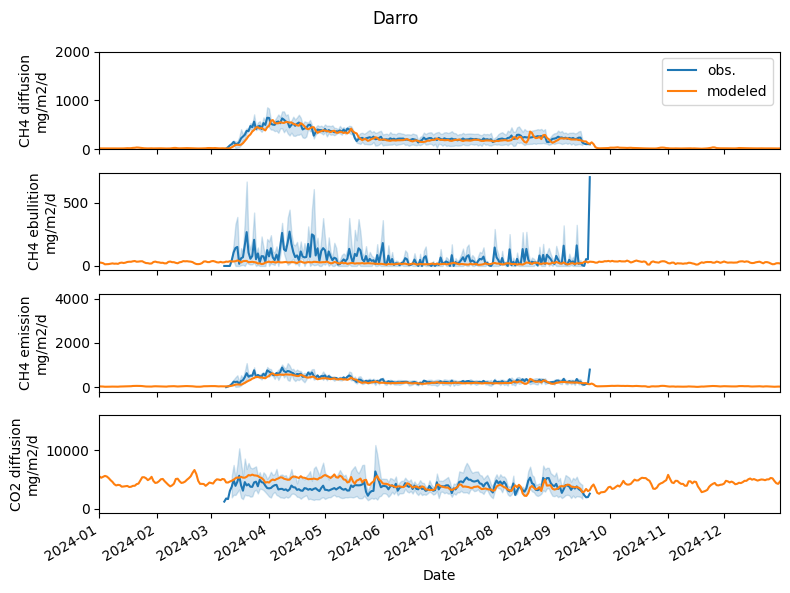

In [27]:
fig, axes=plt.subplots(4,1, figsize=(8,6), sharex=True)

fig.suptitle('Darro')

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_diff_ch4', ax=axes[0], label='obs.')
sns.lineplot(data = methane_Darro, x='Date', y='methane_turb_flux_mg/(m**2*day)', ax=axes[0], label='modeled')

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_ebul_ch4', ax=axes[1])
sns.lineplot(data = methane_Darro, x='Date', y='methane_ebul_mg/(m**2*day)', ax=axes[1])

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', 
             y=df_fluxes.loc[df_fluxes['pond']=='D', 'mg_m2_d_diff_ch4']+df_fluxes.loc[df_fluxes['pond']=='D', 'mg_m2_d_ebul_ch4'], ax=axes[2])
sns.lineplot(data = methane_Darro, x='Date', y=methane_Darro['methane_turb_flux_mg/(m**2*day)'] +methane_Darro['methane_ebul_mg/(m**2*day)'], ax=axes[2])

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_diff_co2', ax=axes[3])
sns.lineplot(data = methane_Darro, x='Date', y='co2_turb_flux_mg/(m**2*day)', ax=axes[3])

plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31'))

axes[0].set_ylim(0,2000)

axes[0].set_ylabel('CH4 diffusion\nmg/m2/d')
axes[1].set_ylabel('CH4 ebullition\nmg/m2/d')
axes[2].set_ylabel('CH4 emission\nmg/m2/d')
axes[3].set_ylabel('CO2 diffusion\nmg/m2/d')


fig.autofmt_xdate()

fig.tight_layout()

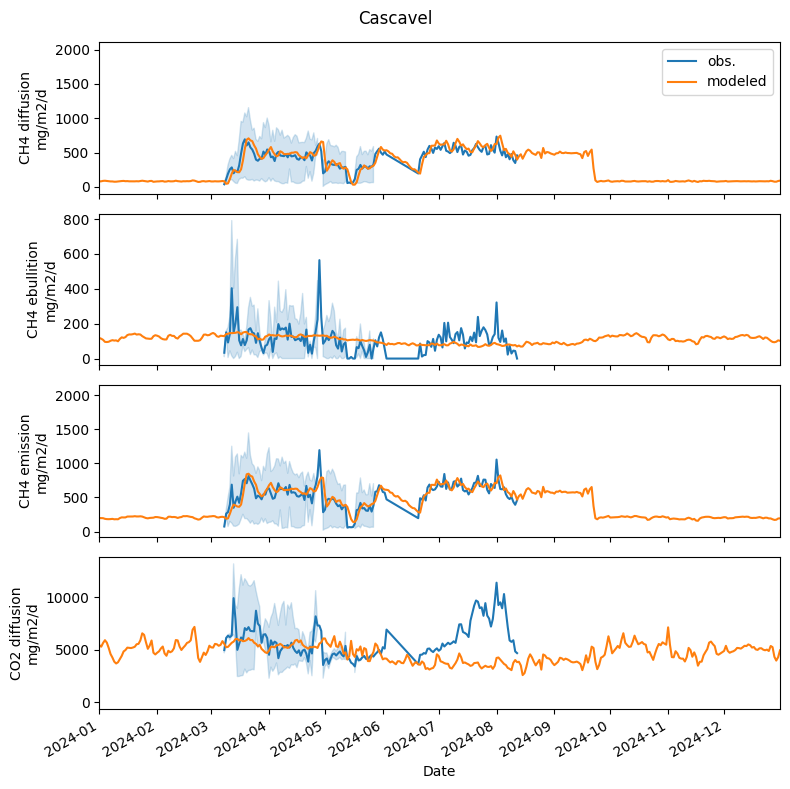

In [28]:
fig, axes=plt.subplots(4,1, figsize=(8,8), sharex=True)

fig.suptitle('Cascavel')

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_diff_ch4', ax=axes[0], label='obs.')
sns.lineplot(data = methane_Cascavel, x='Date', y='methane_turb_flux_mg/(m**2*day)', ax=axes[0], label='modeled')

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_ebul_ch4', ax=axes[1])
sns.lineplot(data = methane_Cascavel, x='Date', y='methane_ebul_mg/(m**2*day)', ax=axes[1])

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', 
             y=df_fluxes.loc[df_fluxes['pond']=='C', 'mg_m2_d_diff_ch4']+df_fluxes.loc[df_fluxes['pond']=='C', 'mg_m2_d_ebul_ch4'], ax=axes[2])
sns.lineplot(data = methane_Cascavel, x='Date', y=methane_Cascavel['methane_turb_flux_mg/(m**2*day)'] +methane_Cascavel['methane_ebul_mg/(m**2*day)'], ax=axes[2])

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_diff_co2', ax=axes[3])
sns.lineplot(data = methane_Cascavel, x='Date', y='co2_turb_flux_mg/(m**2*day)', ax=axes[3])

plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31'))

axes[0].set_ylabel('CH4 diffusion\nmg/m2/d')
axes[1].set_ylabel('CH4 ebullition\nmg/m2/d')
axes[2].set_ylabel('CH4 emission\nmg/m2/d')
axes[3].set_ylabel('CO2 diffusion\nmg/m2/d')

fig.autofmt_xdate()

fig.tight_layout()

In [29]:
path_to_YKD_fluxes = '../data/YKD/in_situ/auto_fluxes/auto_fluxes_all.csv'
YKD_fluxes=pd.read_csv(path_to_YKD_fluxes, parse_dates=['date'])

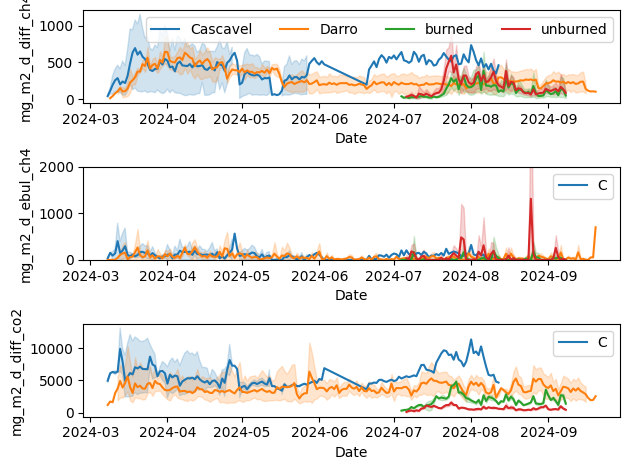

In [30]:
fig, axes = plt.subplots(3,1)

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_diff_ch4', ax=axes[0], label='Cascavel')
sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_diff_ch4',  ax=axes[0], label='Darro')
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='burned'], x='date', y='mg_m2_d_diff_ch4', ax=axes[0], label='burned')
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='unburned'], x='date', y='mg_m2_d_diff_ch4', ax=axes[0], label='unburned')

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_ebul_ch4', hue='pond', ax=axes[1])
sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_ebul_ch4',  ax=axes[1])
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='burned'], x='date', y='mg_m2_d_ebul_ch4', ax=axes[1])
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='unburned'], x='date', y='mg_m2_d_ebul_ch4', ax=axes[1])

sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='C'], x='Date', y='mg_m2_d_diff_co2', hue='pond', ax=axes[2])
sns.lineplot(data = df_fluxes.loc[df_fluxes['pond']=='D'], x='Date', y='mg_m2_d_diff_co2',  ax=axes[2])
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='burned'], x='date', y='mg_m2_d_diff_co2', ax=axes[2])
sns.lineplot(data = YKD_fluxes.loc[YKD_fluxes['pond']=='unburned'], x='date', y='mg_m2_d_diff_co2', ax=axes[2])

axes[1].set_ylim(0,2000)

axes[0].legend(ncol=4)
fig.tight_layout()
